## Project 2 (Pract) :: Salary Project:

Problem Statement
Predict the salary if the employee using the features provided in the data. 

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [123]:
df1=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df1

df=pd.DataFrame(data=df1)
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


#### Checking Info of the dataset

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [125]:
#if has null value, fill those by imputation
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

#### NO NULL VALUES, so let's proceed ahead.

In [126]:
type(df)

pandas.core.frame.DataFrame

In [127]:
df.shape

(397, 6)

In [128]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In this dataset,various factors are mentioned on which an individual's salary is dependent. These factors are 'rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex'.
- It has 397 rows and 6 columns
- Here the Salary can be the target.        

# Visualization of the data

<AxesSubplot:xlabel='rank', ylabel='salary'>

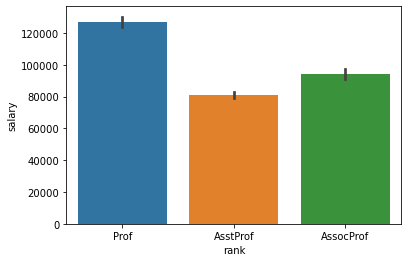

In [129]:
import seaborn as sns
sns.barplot(data=df,y='salary',x='rank')

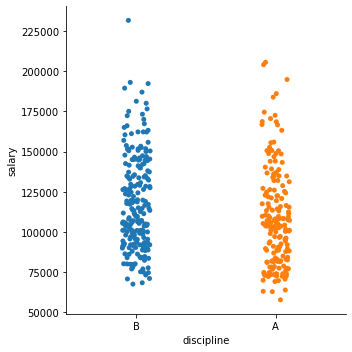

In [130]:
sns.catplot(y='salary',x='discipline', data = df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

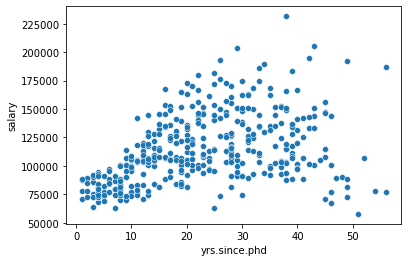

In [131]:
sns.scatterplot(y='salary',x='yrs.since.phd', data = df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

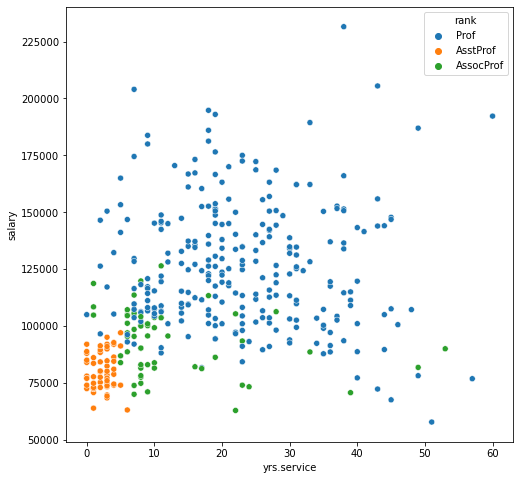

In [132]:
plt.figure(figsize = (8,8))
sns.scatterplot(y='salary',x='yrs.service', hue='rank', data = df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

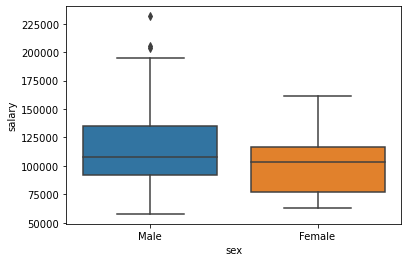

In [133]:
sns.boxplot(y='salary',x='sex', data = df)

# Encoding Data Frame
Since few columns are in string, we are converting those in numerical data with label encoder.

In [134]:
le=LabelEncoder() 
list1=['rank','discipline','sex']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


## EXPLATORY DATA ANALYSIS(EDA)

In [135]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


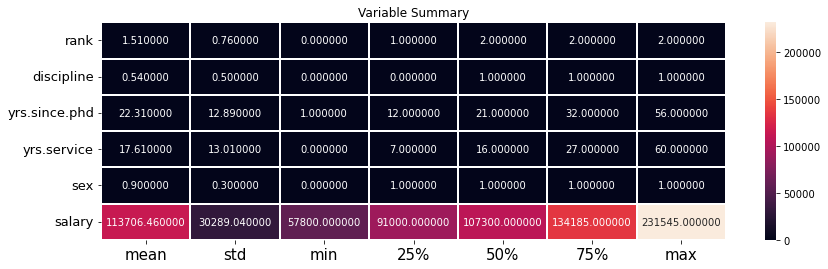

In [136]:
#plotting heat map for better understanding:
plt.figure(figsize=(14,4))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Variable Summary")
plt.show()

### Describing the dataset:
- The mean > Median in 'years since phd' and 'years serive column', which means data is right skewed. 
- Std deviation is high in 'years since phd' and 'years serive column',which means data is highly spread.
- High gap is present between 75% and max of 'years since phd' and 'years serive column' which means outliers might be present.

## Check Correlation of columns with the target:

In [137]:
df.corr() #correlation 

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

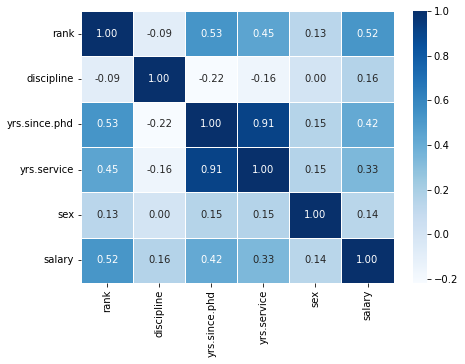

In [138]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidth=0.5,fmt='0.2f')

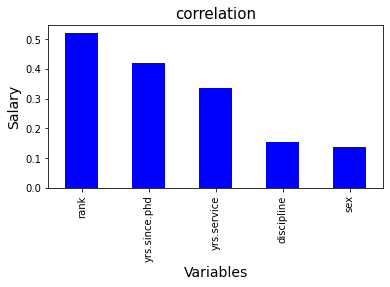

In [139]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(6,3))
df.corr()["salary"].sort_values(ascending=False).drop(["salary"]).plot(kind='bar', color='b')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Salary",fontsize=14)
plt.title("correlation",fontsize=15)
plt.show()

In [140]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

#### From the heat map it can be seen that the 'Salary' is having maximum positive correlation with following factors:
- yrs.service     =  0.334745 ==33%
- yrs.since.phd   =  0.419231 ==42%
- rank            = 0.522207  ==52%

# Checking Outliers:

rank                AxesSubplot(0.125,0.657941;0.133621x0.222059)
discipline       AxesSubplot(0.285345,0.657941;0.133621x0.222059)
yrs.since.phd     AxesSubplot(0.44569,0.657941;0.133621x0.222059)
yrs.service      AxesSubplot(0.606034,0.657941;0.133621x0.222059)
sex              AxesSubplot(0.766379,0.657941;0.133621x0.222059)
salary              AxesSubplot(0.125,0.391471;0.133621x0.222059)
dtype: object

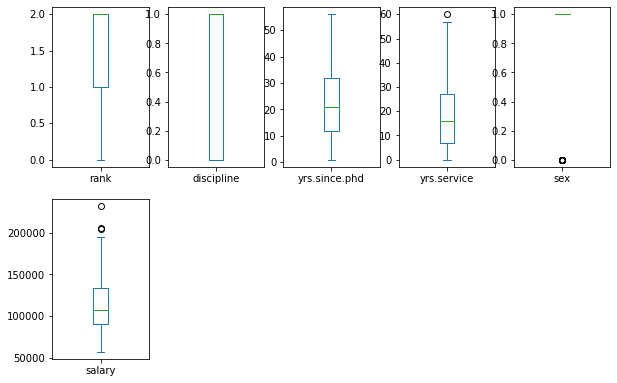

In [141]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10))

#### Yrs.service column shows 1 point out of range,it might be an outlier . Otherwise, there are no Outliers present in the data. Salary column shows few out of range points but we will ignore those as it is the target column for us.

Since removing the outliers results in 10% data loss approx, we are not removing it.

# Check Skewness

In [142]:
x=df.drop('salary',axis=1)
y=df['salary']

In [143]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [144]:
df['yrs.service']=np.sqrt(df['yrs.service'])
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service     -0.160353
sex             -2.709958
salary           0.714568
dtype: float64

<AxesSubplot:ylabel='Frequency'>

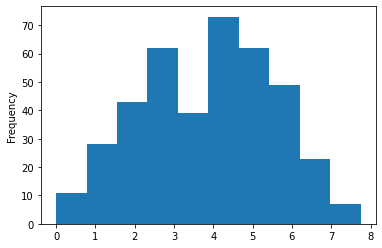

In [145]:
df['yrs.service'].plot.hist()

Skewness removed

## Scaling The Data using Standard Scaler
### Since the data is continous we will use the linear regression model

In [146]:
from sklearn.preprocessing import StandardScaler #import Lin reg,r2score,TestTrainSplit,metrics
sc=StandardScaler()
lr=LinearRegression()
x=sc.fit_transform(x)
x

array([[ 0.64925739,  0.91540317, -0.25754973,  0.02966908,  0.3300584 ],
       [ 0.64925739,  0.91540317, -0.17985426, -0.12429986,  0.3300584 ],
       [-0.67256406,  0.91540317, -1.42298184, -1.12509795,  0.3300584 ],
       ...,
       [ 0.64925739, -1.09241483,  1.52944617,  0.56856036,  0.3300584 ],
       [ 0.64925739, -1.09241483,  0.20862311, -0.20128433,  0.3300584 ],
       [-0.67256406, -1.09241483, -1.11219995, -1.04811348,  0.3300584 ]])

In [147]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print(f"At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state {i} the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:0.3550238434302403
At random state 0 the testing accuracy is: 0.396060647181417


At random state 1,the training accuracy is:0.37413919185916744
At random state 1 the testing accuracy is: 0.33677702304172463


At random state 2,the training accuracy is:0.41687571661881473
At random state 2 the testing accuracy is: 0.23060233337966607


At random state 3,the training accuracy is:0.39613434806065784
At random state 3 the testing accuracy is: 0.3094944883291526


At random state 4,the training accuracy is:0.3785826865891475
At random state 4 the testing accuracy is: 0.32743071679922586


At random state 5,the training accuracy is:0.43882583723634006
At random state 5 the testing accuracy is: 0.17883268171353328


At random state 6,the training accuracy is:0.3757766184446494
At random state 6 the testing accuracy is: 0.35351150059722114


At random state 7,the training accuracy is:0.3483165572872464
At random state 7 the testing accuracy is: 0.425

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=59)

In [149]:
lr.fit(x_train,y_train)

LinearRegression()

In [150]:
pred_test=lr.predict(x_test)

In [151]:
print(r2_score(y_test,pred_test))

0.3582897291997149


# Cross Validation Method

In [152]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for a in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=a)
    cv_mean=cv_score.mean()
    print(f"At cross fold {a}, the CV score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print("\n")

At cross fold 2, the CV score is 0.3270801167406512 and accuracy score for training is -0.3740680371540015 and accuracy score for testing is 0.3582897291997149


At cross fold 3, the CV score is 0.32033286730598814 and accuracy score for training is -0.3740680371540015 and accuracy score for testing is 0.3582897291997149


At cross fold 4, the CV score is 0.3218196693768359 and accuracy score for training is -0.3740680371540015 and accuracy score for testing is 0.3582897291997149


At cross fold 5, the CV score is 0.2956992866387173 and accuracy score for training is -0.3740680371540015 and accuracy score for testing is 0.3582897291997149


At cross fold 6, the CV score is 0.3309634183929555 and accuracy score for training is -0.3740680371540015 and accuracy score for testing is 0.3582897291997149


At cross fold 7, the CV score is 0.32577044199965366 and accuracy score for training is -0.3740680371540015 and accuracy score for testing is 0.3582897291997149


At cross fold 8, the CV sc

Since the folds arent having any impact on the accuracy score of training and testing, hence we can select cv=8.
The Underfitting and Overfitting has been done in above steps using the R2 Score.

<function matplotlib.pyplot.show(close=None, block=None)>

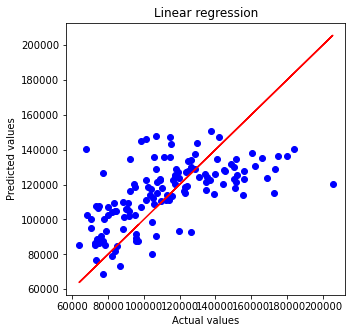

In [153]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual values",fontsize=10)
plt.ylabel("Predicted values",fontsize=10)
plt.title("Linear regression")
plt.show

The best fit line is going through most points although some points arent covered.

## Regularization techniques

In [154]:
from sklearn.linear_model import Lasso, Ridge

ls=Lasso(alpha=0.0001)
#ls=Lasso, alpha is set at 1.0 as default
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))
print("Mean Squared error=",np.sqrt(mean_squared_error(y_test,predlasso)))

0.37602061029705625
562701917.378893
Mean Squared error= 23721.33886143219


In [155]:
#try to minimize the coeff variance

rd=Ridge(alpha=0.0001)
#rd=Ridge()
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
predridge=rd.predict(x_test)
print(mean_squared_error(y_test,predridge))
print("Mean Squared error=",np.sqrt(mean_squared_error(y_test,predridge)))

0.37602061029641876
562701814.5429325
Mean Squared error= 23721.336693848694


In [156]:
#Elastic net is the combi of lasso and ridge
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
#enr=ElasticNet()
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))

print("Mean Squared error=",np.sqrt(mean_squared_error(y_test,predridge)))

0.3760205991108013
Mean Squared error= 23721.336693848694


### From above, since th score in Lasso regression is 36.03%, It can be said that the Lasso regularization technique works best!

## Saving the model

In [157]:
import pickle
filename="Salary.pkl"
pickle.dump(lr,open(filename,'wb'))


## Conclusion:

In [158]:
loaded_model=pickle.load(open(filename,'rb'))

result =loaded_model.score(x_test,y_test)
print(result)

0.3582897291997149


#### The model works 36%

In [159]:
Conc=pd.DataFrame([loaded_model.predict(x_test)[:],predlasso[:]],index=['Predicted','Orginial'])
Conc

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
Predicted,87560.094501,89138.348581,73259.265112,118611.481693,120511.951602,100444.462484,85413.679538,93636.416890,109957.432672,118567.62219,...,79046.196738,127210.901356,128874.677335,120597.473502,128466.939607,119297.575747,125192.084483,126469.927027,125373.898137,128960.199235
Orginial,87560.094756,89138.348822,73259.265447,118611.482130,120511.952107,100444.462796,85413.680021,93636.416749,109957.432849,118567.62282,...,79046.197019,127210.901511,128874.677219,120597.473750,128466.939665,119297.576285,125192.084401,126469.926965,125373.898278,128960.198862


# END